# Part I - (Prosper's Loan Data Analysis: Wragling and Visualisation )
## by (Habeeb Adewale Abdulrasaq)

## Introduction

> In conducting this analysis, loan dataset from Prosper was used. This loan dataset has 113,937 loan observations and 81 columns/fields which include interest rate, lender yeild, borrower's income, loan close date, credit rating, borrower's occupation, estimated loss, loan tenure, investors and many other field names..


## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
#Read the data into Dataframe
loan_df=pd.read_csv('prosperLoanData.csv')

### The Dataset Structure and Assessment

In [6]:
# What is the structure of your dataset/data dimension
loan_df.shape

(113937, 81)

In [7]:
#Display the 10 random Sample of the Data
loan_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
88685,F230343073160765369877A,397935,2008-09-13 20:00:29.907000000,HR,36,Completed,2010-11-02 00:00:00,0.32378,0.3000,0.2900,...,-16.29,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,31
34203,91E73418064124844FE09A5,307030,2008-04-09 19:28:28.627000000,B,36,Completed,2008-12-26 00:00:00,0.20425,0.1910,0.1810,...,-104.43,0.00,0.0,0.0,0.0,1.0000,1,0,0.0,387
38745,6927339540028438886D8F0,180195,2007-08-01 18:42:08.853000000,A,36,Completed,2008-01-16 00:00:00,0.09186,0.0850,0.0750,...,-4.38,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,153
66031,7A2535393894457544E36A8,559799,2012-02-17 08:23:03.047000000,NaN,36,Completed,2012-05-02 00:00:00,0.06587,0.0625,0.0525,...,-16.44,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,214
63277,C7343563642587272A178D6,679743,2012-11-29 12:09:36.203000000,NaN,60,Past Due (61-90 days),NaN,0.30234,0.2759,0.2659,...,-23.32,-65.75,0.0,0.0,0.0,0.8118,0,0,0.0,87
111884,CCFB3593548343294F06EEA,1004541,2013-10-24 17:35:09.233000000,NaN,36,Completed,2013-12-18 00:00:00,0.23233,0.1950,0.1850,...,-5.55,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,19
3333,49CD3540604083685D3B30F,566807,2012-03-09 12:21:02.427000000,NaN,36,Completed,2013-04-23 00:00:00,0.35797,0.3177,0.3077,...,-36.96,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,14
92236,FB2334238001141842AB001,348303,2008-06-10 18:29:18.900000000,D,36,Completed,2011-06-10 00:00:00,0.16461,0.1430,0.1330,...,-32.96,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,87
64744,67333603355319350C04F2F,1194704,2014-02-14 12:42:38.360000000,NaN,60,Current,NaN,0.18580,0.1620,0.1520,...,0.00,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,26
102532,2C1F35796613796898D5A7D,779251,2013-05-14 16:51:59.793000000,NaN,60,Current,NaN,0.17522,0.1519,0.1419,...,-28.85,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,1


In [8]:
#Display the data description of numeric columns
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
# Show the null/missing values in the dataset
loan_df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [10]:
# Show the dataframe info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [11]:
#Show all the colums in the dataset
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [12]:
#Select the columns based on the variables of interest 
#Or features to be investigated using univariate, bivariate and multivariate analysis

feat = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate','Occupation','StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
       'EmploymentStatus', 'ClosedDate', 'IsBorrowerHomeowner','LenderYield']

In [13]:
#Use the features above to create a new dataset that would be used for the further investigation
loan_df1 = loan_df[feat]

#Show the random sample data information
loan_df1.sample(10)

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,Occupation,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,ClosedDate,IsBorrowerHomeowner,LenderYield
51252,20000,0.23052,0.2059,Analyst,10000.000000,60,C,Employed,NaN,False,0.1959
109597,4500,0.17018,0.1485,Sales - Commission,2416.666667,36,NaN,Full-time,2009-10-09 00:00:00,False,0.1385
28864,15000,0.18423,0.1697,Other,2000.000000,36,NaN,Full-time,2010-06-09 00:00:00,False,0.1597
53303,10000,0.21576,0.1915,Professional,4726.000000,60,C,Employed,NaN,False,0.1815
24314,12500,0.20268,0.1660,Sales - Commission,4166.666667,36,C,Employed,NaN,True,0.1560
110583,2500,0.37453,0.3500,Sales - Commission,4333.333333,36,E,Full-time,2012-10-01 00:00:00,True,0.3400
33860,25000,0.11696,0.1100,Computer Programmer,12500.000000,36,NaN,Not available,2009-03-06 00:00:00,True,0.1050
39097,5284,0.29510,0.2599,Sales - Commission,5750.000000,36,D,Employed,2013-03-19 00:00:00,False,0.2499
62455,4000,0.20626,0.1695,Other,4916.666667,36,C,Employed,NaN,False,0.1595
1375,15000,0.17685,0.1535,Construction,5000.000000,60,B,Self-employed,NaN,False,0.1435


In [14]:
#Correlation between the selected variables
loan_df1.corr()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,IsBorrowerHomeowner,LenderYield
LoanOriginalAmount,1.000000,-0.322887,-0.328960,0.201259,0.338927,0.206787,-0.328455
BorrowerAPR,-0.322887,1.000000,0.989824,-0.082338,-0.011183,-0.132823,0.989329
BorrowerRate,-0.328960,0.989824,1.000000,-0.088982,0.020085,-0.134431,0.999211
StatedMonthlyIncome,0.201259,-0.082338,-0.088982,1.000000,0.028479,0.140051,-0.088208
Term,0.338927,-0.011183,0.020085,0.028479,1.000000,0.085339,0.020556
IsBorrowerHomeowner,0.206787,-0.132823,-0.134431,0.140051,0.085339,1.000000,-0.132993
LenderYield,-0.328455,0.989329,0.999211,-0.088208,0.020556,-0.132993,1.000000


In [15]:
#Show the summary statistics of the data
loan_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanOriginalAmount,113937.0,8337.013850,6245.800580,1000.00000,4000.000000,6500.000000,12000.00000,3.500000e+04
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
StatedMonthlyIncome,113937.0,5608.025568,7478.497275,0.00000,3200.333333,4666.666667,6825.00000,1.750003e+06
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.124200,0.173000,0.24000,4.925000e-01


In [16]:
#Show the missing values of the new dataset
loan_df1.isna().sum()

LoanOriginalAmount           0
BorrowerAPR                 25
BorrowerRate                 0
Occupation                3588
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29084
EmploymentStatus          2255
ClosedDate               58848
IsBorrowerHomeowner          0
LenderYield                  0
dtype: int64

In [17]:
#Show the new data information
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
LoanOriginalAmount       113937 non-null int64
BorrowerAPR              113912 non-null float64
BorrowerRate             113937 non-null float64
Occupation               110349 non-null object
StatedMonthlyIncome      113937 non-null float64
Term                     113937 non-null int64
ProsperRating (Alpha)    84853 non-null object
EmploymentStatus         111682 non-null object
ClosedDate               55089 non-null object
IsBorrowerHomeowner      113937 non-null bool
LenderYield              113937 non-null float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 8.8+ MB


### The Issues from the Dataset - based on my interest
1. There are a lot of missing value in the dataset and this needs to be treated by interpolation
2. The date columns are not in date data type and they would need to be changed
3. The true and false in ishomeowner column needs to be changed to home owner and non-home owner
4. There is high correlation between borrower's APR and borrower's rating

In [18]:
#There are four features in the new dataset
#Using any of the suitable central of tendency to fill in the missing values using pandas function

#Using the average BorrowerAPR to fill in the missing value
loan_df1['BorrowerAPR'].fillna(loan_df1['BorrowerAPR'].mean(), inplace = True)
                                        
#Using the most occuring ocupation to fill in the missing value
loan_df1['Occupation'].fillna(loan_df1['Occupation'].mode()[0], inplace = True)

#Using the the most occuring ProsperRating (Alpha) to fill in the missing value

loan_df1['ProsperRating (Alpha)'].fillna(loan_df1['ProsperRating (Alpha)'].mode()[0], inplace = True)

#Using the the most occuring EmploymentStatus to fill in the missing value

loan_df1['EmploymentStatus'].fillna(loan_df1['EmploymentStatus'].mode()[0], inplace = True)

#Using the the most occuring closedate to fill in the missing value
loan_df1['ClosedDate'].fillna(loan_df1['ClosedDate'].mode()[0], inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
#Testing the presence of missing value in the dataset
loan_df1.isna().sum()

LoanOriginalAmount       0
BorrowerAPR              0
BorrowerRate             0
Occupation               0
StatedMonthlyIncome      0
Term                     0
ProsperRating (Alpha)    0
EmploymentStatus         0
ClosedDate               0
IsBorrowerHomeowner      0
LenderYield              0
dtype: int64

In [20]:
#Covert the ClosedDate current data type to date type
loan_df1['ClosedDate']=pd.to_datetime(loan_df1['ClosedDate'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
#Testing the ClosedDate type field in the dataset
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
LoanOriginalAmount       113937 non-null int64
BorrowerAPR              113937 non-null float64
BorrowerRate             113937 non-null float64
Occupation               113937 non-null object
StatedMonthlyIncome      113937 non-null float64
Term                     113937 non-null int64
ProsperRating (Alpha)    113937 non-null object
EmploymentStatus         113937 non-null object
ClosedDate               113937 non-null datetime64[ns]
IsBorrowerHomeowner      113937 non-null bool
LenderYield              113937 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 8.8+ MB


In [22]:
#Change the true and false in ishomeowner columns to home owner for true and non home owner for false instance
loan_df1['IsBorrowerHomeowner']=loan_df1['IsBorrowerHomeowner'].map({True: 'Homer Owner', False:'Non Home Owner'})

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
loan_df1['IsBorrowerHomeowner'].value_counts()

Homer Owner       57478
Non Home Owner    56459
Name: IsBorrowerHomeowner, dtype: int64

#### Feature engineering 

In [24]:
#Create new variable named borrower's cost (rate) using the average of borrower's APR and borrower's rating
loan_df1['BorrowerCost (Rate)']=loan_df1[['BorrowerAPR', 'BorrowerRate']].mean(axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
loan_df1.sample(5)

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,Occupation,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,ClosedDate,IsBorrowerHomeowner,LenderYield,BorrowerCost (Rate)
12346,5000,0.36438,0.3400,Executive,10000.000000,36,E,Full-time,2013-07-30,Non Home Owner,0.3300,0.352190
25452,4000,0.35797,0.3177,Retail Management,3333.333333,36,HR,Employed,2014-03-04,Non Home Owner,0.3077,0.337835
11340,9000,0.13227,0.1099,Skilled Labor,6141.666667,60,A,Employed,2014-03-04,Homer Owner,0.0999,0.121085
14867,13500,0.19029,0.1535,Professional,7734.166667,36,C,Employed,2014-03-04,Homer Owner,0.1435,0.171895
26168,12000,0.22283,0.1984,Other,5416.666667,60,C,Employed,2014-03-04,Homer Owner,0.1884,0.210615


In [26]:
#Drop borrower's APR and borrower's rating
loan_df1.drop(['BorrowerAPR', 'BorrowerRate'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
print(loan_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
LoanOriginalAmount       113937 non-null int64
Occupation               113937 non-null object
StatedMonthlyIncome      113937 non-null float64
Term                     113937 non-null int64
ProsperRating (Alpha)    113937 non-null object
EmploymentStatus         113937 non-null object
ClosedDate               113937 non-null datetime64[ns]
IsBorrowerHomeowner      113937 non-null object
LenderYield              113937 non-null float64
BorrowerCost (Rate)      113937 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 8.7+ MB
None


### What is the structure of your dataset?

> The original dataset has dimension of 113937 rows and 81 columns. But the data to be used for further analysis only has data structure of 113937 rows and 10 features

### What is/are the main feature(s) of interest in your dataset?

> My main variable of interest in my dataset carved out from the main dataset is borrower's cost (rate) which is a derived column from borrower's APR and rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From the domain knowledge of credit industry business I posses, I think the features that would help me on Borrower's cost that support my investigation in the cause are the ClosedDate, StatedMonthly Income, LenderYield, Occupation, Term, Loan original amount, Prosper Rating Alpha, Employment Status, and being a home owner or not, should be my main causes in investigating and examining the main features of interest in my dataset.

## Univariate Exploration

Text(0.5,1,'Histogram of Borrower Cost (Rate)')

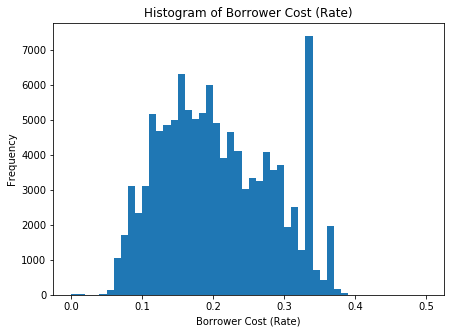

In [28]:
#Visualise the variable of interest using histogram plot
bins = np.arange(0, loan_df1['BorrowerCost (Rate)'].max()+0.001, 0.01)
plt.figure(figsize=[7, 5])
plt.hist(data = loan_df1, x = 'BorrowerCost (Rate)', bins = bins);
plt.xlabel('Borrower Cost (Rate)')
plt.ylabel('Frequency')
plt.title('Histogram of Borrower Cost (Rate)')

> From the figure above, the distribution of the borrower's cost does not look normal. Rather, its properties strike a semblance with multimodal. As can be seen from the figure, the Proper's loan have a lot of its borrower's cost mostly centered between 0.1 and 0.28.

#### Examining the factors that can help explain the variation in borrower's cost

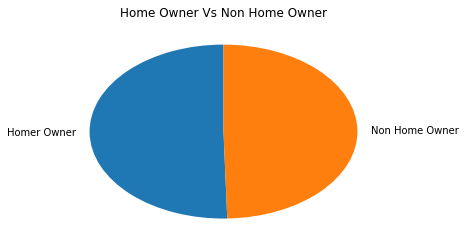

In [29]:
#Plot the homeowner in pie charts to show whether slice of those who are owner and those who are not.
def pie_chart():
    sc = loan_df1['IsBorrowerHomeowner'].value_counts()
    plt.pie(sc, labels = sc.index, startangle = 90, counterclock = True)
    plt.title('Home Owner Vs Non Home Owner')
pie_chart()

> From the visal above, it is quite glaring that there is barely any visible difference between the number of Home owners and non home owner, even though Home owner slightly seems to be a little more than the number of non-home owners in the dataset

In [30]:
loan_df1.describe()

,LoanOriginalAmount,StatedMonthlyIncome,Term,LenderYield,BorrowerCost (Rate)
count,113937.00000,1.139370e+05,113937.000000,113937.000000,113937.000000
mean,8337.01385,5.608026e+03,40.830248,0.182701,0.205796
std,6245.80058,7.478497e+03,10.436212,0.074516,0.077385
min,1000.00000,0.000000e+00,12.000000,-0.010000,0.003265
25%,4000.00000,3.200333e+03,36.000000,0.124200,0.144845
50%,6500.00000,4.666667e+03,36.000000,0.173000,0.195870
75%,12000.00000,6.825000e+03,36.000000,0.240000,0.268500
max,35000.00000,1.750003e+06,60.000000,0.492500,0.504895


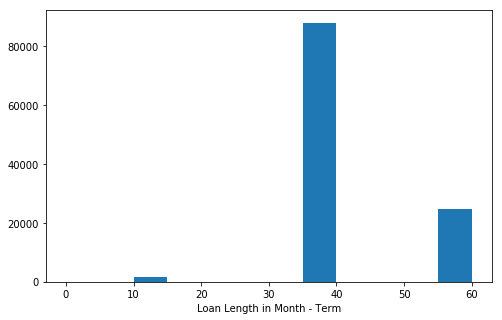

In [31]:
#Visualise Loan's Term
bins = np.arange(0, loan_df1['Term'].max()+5, 5)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df1, x = 'Term', bins = bins);
plt.xlabel('Loan Length in Month - Term');

>As obtained from the visual above, between 36 abd 40 months most clients have their loan terms in that rage while 55 and 60 seems follow suit but not as much as former.

In [32]:
#def bar_chart_1():
 # data setup
   # bc = sb.color_palette()[2]
    #sb.countplot(data = loan_df1, x = 'ProsperRating (Alpha)', color = bc)
    #plt.ylabel('Frequency')
    #plt.xlabel('ProsperRating (Alpha)')
    #plt.title('Prosper Rating - Alpha')
#bar_chart_1()

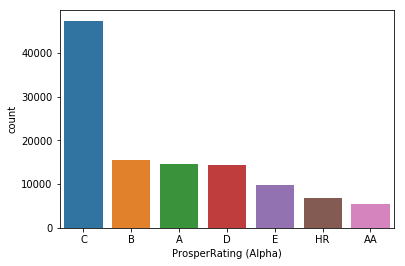

In [33]:
def bar_chart1():
    
    hm=sb.countplot(x=loan_df1['ProsperRating (Alpha)'],
                   order=loan_df1['ProsperRating (Alpha)'].value_counts(ascending=False).index)
    abs1=loan_df1['ProsperRating (Alpha)'].value_counts(ascending=False).values
    #hm.label(container=hm.containers[0], labels=abs1)
    
#Display the bar function created above
bar_chart1()

>From the chart above, it seems that a lot of borrowers are on C rating and the AA rating have fewer borrowers on it.

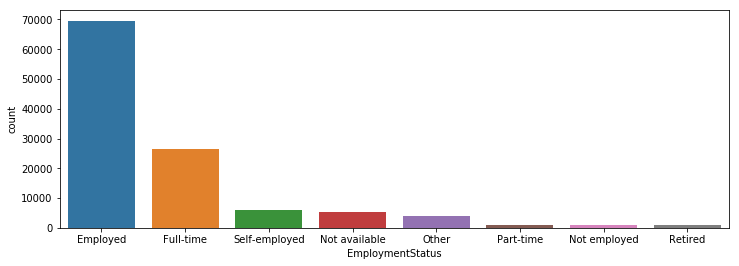

In [35]:
def bar_chart3():
    plt.figure(figsize=[12, 4])
    hm=sb.countplot(x=loan_df1['EmploymentStatus'],
                   order=loan_df1['EmploymentStatus'].value_counts(ascending=False).index)
    abs1=loan_df1['EmploymentStatus'].value_counts(ascending=False).values
    #hm.label(container=hm.containers[0], labels=abs1)
    
#Display the bar function created above
bar_chart3()

> As observed from the visual, those who are employed constitute a higher percentage of those who sought loan from Prosper and this follows by Full-time. While those are retired, unemployed and part-time comprises who barely demand for loan

Text(0.5,1,'Histogram of Lender Yield')

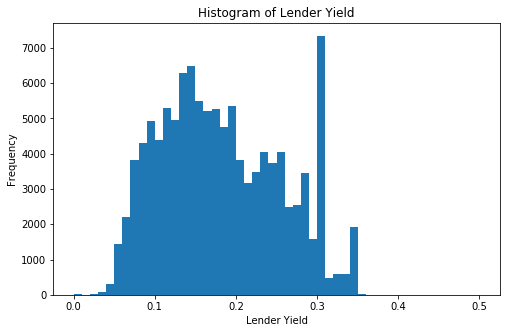

In [36]:
#Visualise Loan's Yield using the histogram
bins = np.arange(0, loan_df1.LenderYield.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df1, x = 'LenderYield', bins = bins);
plt.xlabel('Lender Yield')
plt.ylabel('Frequency')
plt.title('Histogram of Lender Yield')

> From the figure above, the distribution of the lender's yield does not look normal. Rather, its properties strike a semblance with multimodal. As can be seen from the figure, the Proper's loan have a lot of its borrower's cost mostly centered between 0.1 and 0.28.

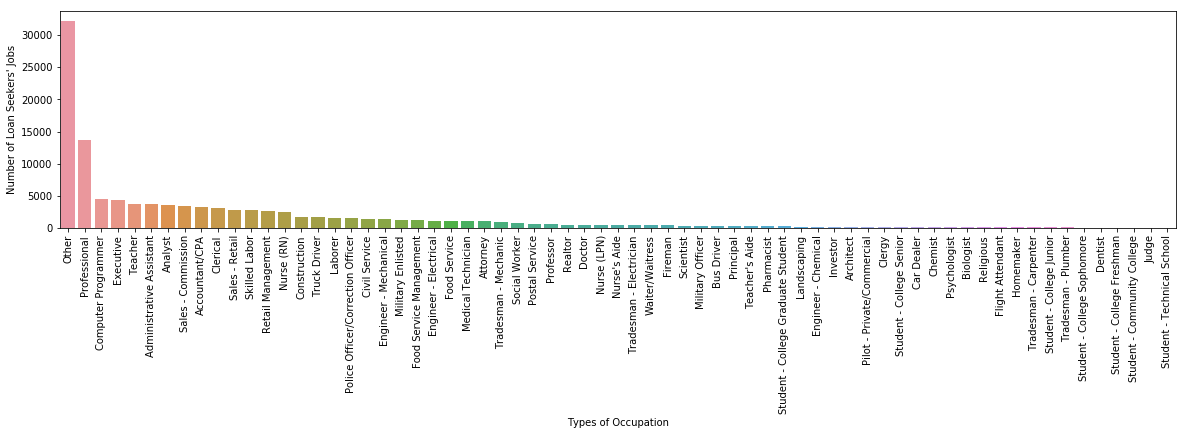

In [37]:
def bar_chart3():
    plt.figure(figsize=[20, 4])
    hm=sb.countplot(x=loan_df1['Occupation'],
                   order=loan_df1['Occupation'].value_counts(ascending=False).index)
    abs1=loan_df1['Occupation'].value_counts(ascending=False).values
    plt.xticks(rotation=90)
    plt.xlabel('Types of Occupation')
    plt.ylabel("Number of Loan Seekers' Jobs")
    #hm.label(container=hm.containers[0], labels=abs1)
    
#Display the bar function created above
bar_chart3()

>From the observation of the visual above, those who have their jobs stated as others, follow by professional, computer programming, executive, Teacher, Administrative Assistant and Analyst top the list of those seeking for loan while dentist, students, judge and plumber are least of those who sought loan

Text(0.5,1,'Histogram of Loan Original Amount')

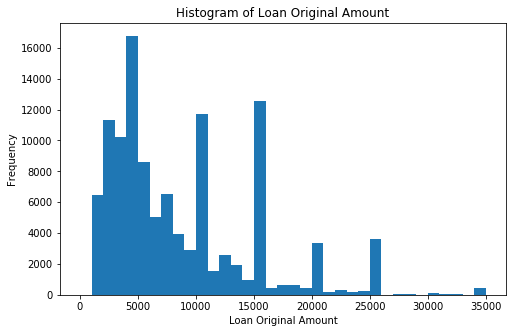

In [38]:
#Visualise Loan's Loan Original Amount using the histogram
bins = np.arange(0, loan_df1.LoanOriginalAmount.max()+1000, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df1, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Original Amount')

>The visual above shows the attributes of multimodal curve and equally shows that majority of the loan seekers have their being between 1,000 and 15,000 with just only few that requested for loan of more than 35,000

Text(0.5,1,'Histogram of Stated Monthly Income')

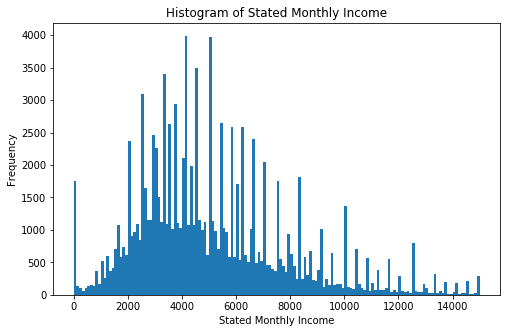

In [39]:
#Visualise Loan's Loan Original Amount using the histogram
bins = np.arange(0, 15000+10, 100)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df1, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income')
plt.ylabel('Frequency')
plt.title('Histogram of Stated Monthly Income')

>The visual above shows the attributes of multimodal curve and equally shows that the stated monthly income of the loan seekers largely fall between 0 and 12,500 with just only few income above 12,500

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the visual representation of my variable of interest which is borrower's cost (rate), I osberve that its distribution follows multimodal distribution as it is evident in its properties, and given that this scenario does not warranty that distribution looks like normal distribution, hence no further transformation was performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the features I investigated, there appears to be unusual distribution which is multimodal. I was expecting my histogram to be normally distributed or show a bell shape curve, but rather it exhibited multimodal and this was not expected.

> In order to have a meaningful visual representation of those variables that are likely to be the determinants or can possibly cause variations or changes in my variable of interest, some data form was either transformed from one form to the other or tidied to have the insights using univariate analysis technique and the visual output obtained from them were meaningful to a great extent...

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

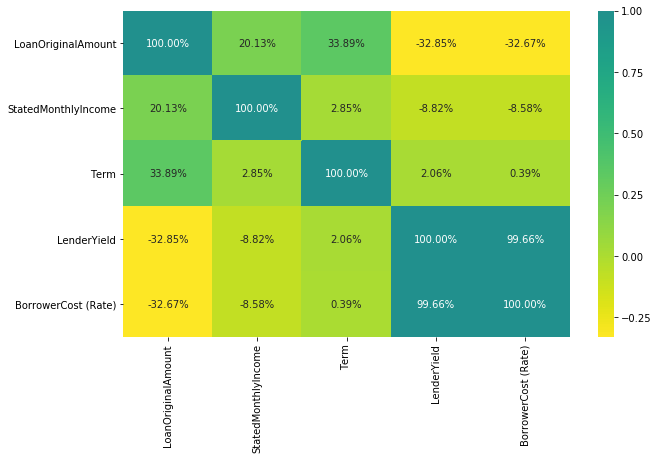

In [40]:
#Show the heatman-correlation plot among all the numeric variables and the variable of interest(borrower's cost)
plt.figure(figsize = [10, 6])
sb.heatmap(loan_df1[['LoanOriginalAmount','StatedMonthlyIncome','Term', 'LenderYield',
                    'BorrowerCost (Rate)']].corr(), annot = True, fmt = '.2%',
           cmap = 'viridis_r', center = 1);

> From the heatmap above, it can be seen the different relationship or association between various of numeric variables including our variable of interest (borrower's cost(%)). As evident from the hitmap visual, borrower's cost has almost perfect positive relation with lender yield, no correlation with term, extremely negative weak correlation with stated monthly income and fair negative correaltion with loan amount.

>

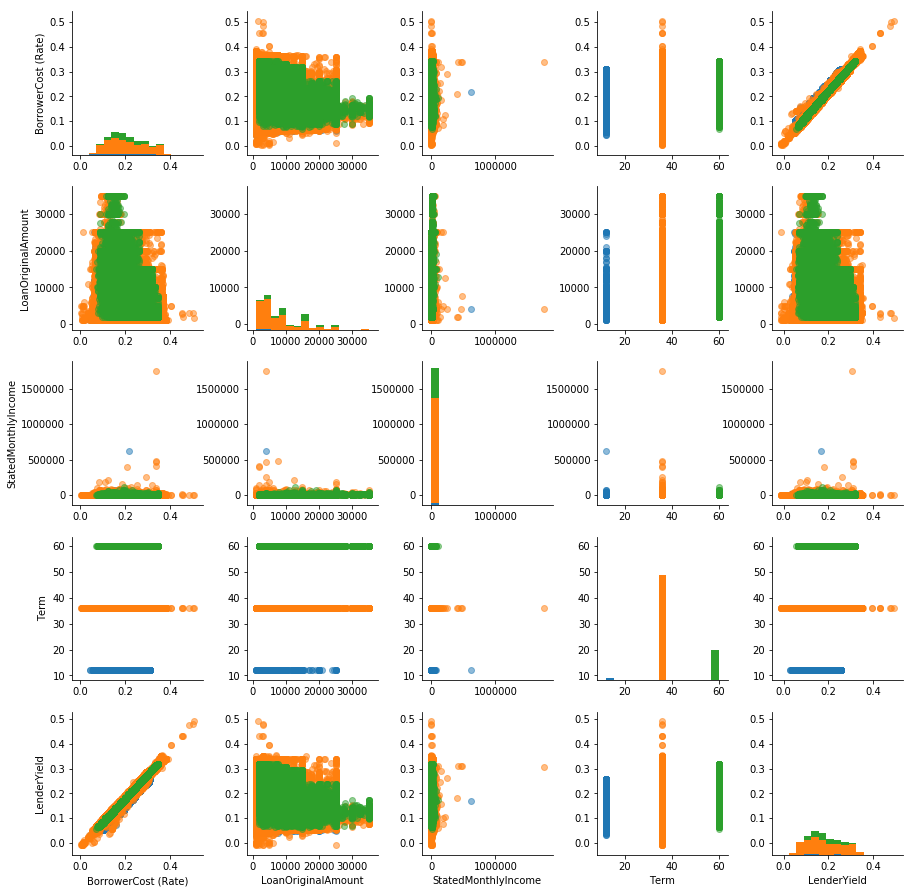

In [41]:
#Display the visual relationship using scatter plot among all the numeric variables 
#And use the loan's term as hue for legend
g = sb.PairGrid(data = loan_df1, vars = ['BorrowerCost (Rate)',
                    'LoanOriginalAmount','StatedMonthlyIncome','Term', 'LenderYield'], hue="Term")
g = g.map_diag(plt.hist, bins=15)
g.map_offdiag(plt.scatter, alpha=0.5);

> As seen from the visual grid of borrower's cost (%) which is mostly between 0.01 and 0.4, the variable of interest has cluttered negative relationship with loan and seems to be mostly vertically proportion to monthly income. For term, for 40-month term, the interest seems to have higher's range of borrower's cost and lower with 10-month term. Lastly, it shows perfectly positive relation with lender's yeild rate. And other numeric variables equally have their relationship shown as can be seen...

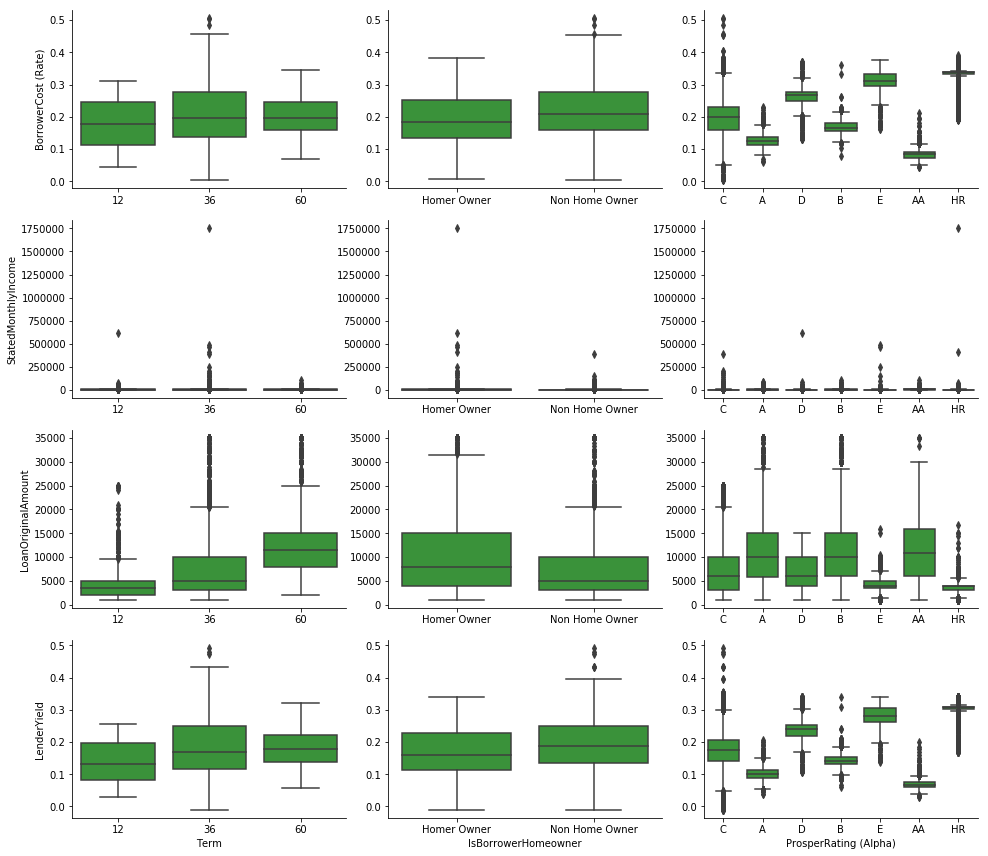

In [42]:
# plot matrix of numeric features against categorical features.
def showmegrid(x, y, **kwargs):
    """ This function creates seaborn's PairGrid of variable of interest with respect to the 
    non-numeric fields in the dataset. """
    bc = sb.color_palette()[2]
    sb.boxplot(x, y, color = bc)

plt.figure(figsize = [10, 10])
h = sb.PairGrid(data = loan_df1, y_vars = ['BorrowerCost (Rate)', 'StatedMonthlyIncome', 
                                           'LoanOriginalAmount', 'LenderYield'], 
                x_vars = ['Term','IsBorrowerHomeowner','ProsperRating (Alpha)'], size = 3, aspect=1.5)
h.map(showmegrid, bins=20)

> The above visual grid shows the box and whisker plot distribution of each numeric variable including the target one shown in term, homeownerborrowe and porsper's rating.  
> For loan's term equal to 12 month, the average borrower's cost is lower than 0.2, while it is 0.2 for term of 36 and 60. While 36-month term have maximum rate greater 0.5, the other two terms are lowers.
>The Home owner have lower average borrower's cost than non-home owner, same things apply in minimum and maximum borrower's cost.
>From the prosper's rating against borrower's cost, AA has the lowest average borrower's cost follow by A and then B. HR, E and D have highest average borrower's cost as well as their respective maximum borrower's cost in comparison with the others

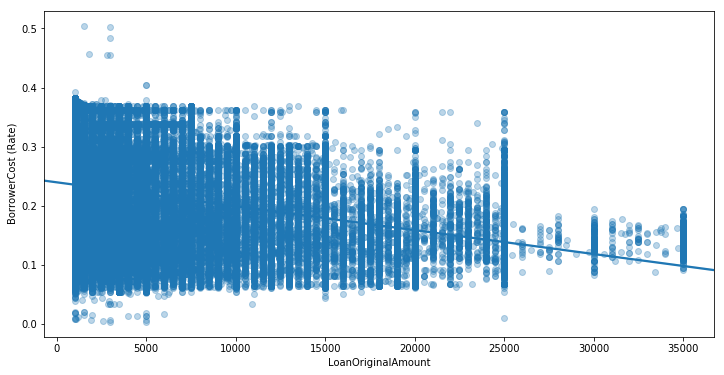

In [43]:
#Display the regression plot between the Borrower Cost and Loan Original Amount
plt.figure(figsize = [12, 6])
sb.regplot(data = loan_df1, x = 'LoanOriginalAmount', 
           y = 'BorrowerCost (Rate)', scatter_kws={'alpha':0.3})


> As can be seen from the figure, the regression line is negatively slope, and this imply that the higher the loan amount the lower it is expected that borrower's cost would be - and the possibility of happening is less probable given the regression line. 
And the lower the loan's amount the high probable the borrower's cost...

Text(0,0.5,"Borrower's Cost (%)")

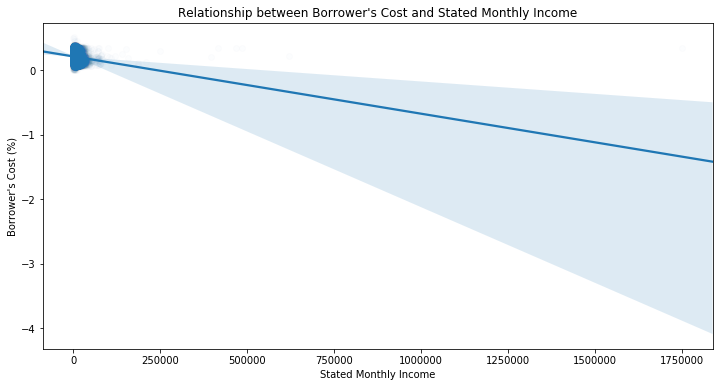

In [44]:
#Show the relationship between Borrower's Cost (Rate) and stated monthly income
plt.figure(figsize = [12, 6])
sb.regplot(data = loan_df1, x = 'StatedMonthlyIncome', y = 'BorrowerCost (Rate)', scatter_kws={'alpha':0.01});
plt.title("Relationship between Borrower's Cost and Stated Monthly Income")
plt.xlabel('Stated Monthly Income')
plt.ylabel("Borrower's Cost (%)")

> From the figure above, the borrower's cost has negatively but weak relationship. And this suggest that the higher the income, the lower the borrower's cost. In fact, some income level suggest that the borrower's cost would likely to be negative.

>Nonetheless, majority the stated monthly income falls below 250,000 and they borrower's cost between 0 and 0.5.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the heatmap above, it can be seen the different relationship or association between various of numeric variables including our variable of interest (borrower's cost(%)). As evident from the hitmap visual, borrower's cost has almost perfect positive relation with lender yield, no correlation with term, extremely negative weak correlation with stated monthly income and fair negative correaltion with loan amount.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As seen from the visual grid of borrower's cost (%) which is mostly between 0.01 and 0.4, the variable of interest has cluttered negative relationship with loan and seems to be mostly vertically proportion to monthly income. For term, for 40-month term, the interest seems to have higher's range of borrower's cost and lower with 10-month term. Lastly, it shows perfectly positive relation with lender's yeild rate. And other numeric variables equally have their relationship shown as can be seen...

> For loan's term equal to 12 month, the average borrower's cost is lower than 0.2, while it is 0.2 for term of 36 and 60. While 36-month term have maximum rate greater 0.5, the other two terms are lowers.
>The Home owner have lower average borrower's cost than non-home owner, same things apply in minimum and maximum borrower's cost.
>From the prosper's rating against borrower's cost, AA has the lowest average borrower's cost follow by A and then B. HR, E and D have highest average borrower's cost as well as their respective maximum borrower's cost in comparison with the others

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

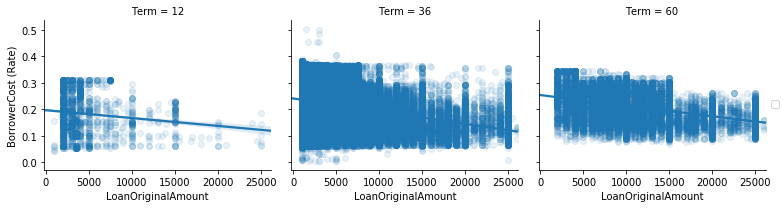

In [45]:
#Given that there are three term's effect from the loan's data,
#Examine the effect of term (loan's lengths in month) on borrower's cost (%) and amount of loan requested
h1=sb.FacetGrid(data=loan_df1, aspect=1.2, col='Term', col_wrap=3)
h1.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerCost (Rate)', x_jitter=0.04, scatter_kws={'alpha':0.1});
h1.add_legend();

> For the term of 12 months, it seems that majority that sought it mostly go for 5,000. And as this can be seen above, there is negative but weak relationship between loan amount and borrower's cost.

> For the term of 36 months, there appears most loan seekers went for this and the negative but moderately relationship was inferred. Most loan seeks go for loan amount between 5,000 and 25,000 unlike lower terms.

> For the term of 60 months, the slope of loan amount with respect to borrower's cost is steeper the remaining two and this show there is negative relationship between the two and most loan seeks go for loan amount between 5,000 and 25,000 unlike those with 12 months term.

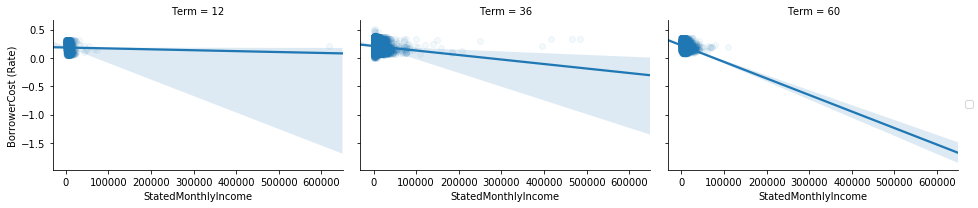

In [46]:
#Given that there are three term's effect from the loan's data,
#Examine the effect of term (loan's lengths in month) on borrower's cost (%)
#And the claimed monthly income of the loan seekers
h1=sb.FacetGrid(data=loan_df1, aspect=1.5, col='Term', col_wrap=3)
h1.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerCost (Rate)', x_jitter=0.05, scatter_kws={'alpha':0.05});
h1.add_legend()

> For the term of 12 months, it seems that majority that sought it mostly go for 5,000. And as this can be seen above, there is negative but weak relationship between loan amount and borrower's cost.

> For the term of 36 months, there appears most loan seekers went for this and the negative but moderately relationship was inferred. Most loan seeks go for loan amount between 5,000 and 25,000 unlike lower terms.

> For the term of 60 months, the slope of loan amount with respect to borrower's cost is steeper the remaining two and this show there is negative relationship between the two and most loan seeks go for loan amount between 5,000 and 25,000 unlike those with 12 months term.

In [ ]:
#Given that there are many recorded rating from the loan's data,
#Examine the effect of prosper's rating (A,AA,B, D etc) on borrower's cost (%)
#And the claimed monthly income of the loan seekers
h2=sb.FacetGrid(data=loan_df1, aspect=1.8, col='ProsperRating (Alpha)', col_wrap=3)
h2.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerCost (Rate)', x_jitter=0.04, scatter_kws={'alpha':0.1});
h2.add_legend();

> The visual grid exhibit the relationship between borrowing cost (our variable of interest) and loan amount as per the rating.
> The C rating show that borrowing cost might not change for any amount of loan sought and the same thing for A, D, and B ratings. Only E, AA and HR that have a slight possible change in borrowing cost with respect to loan amount request.

In [ ]:
#Examine the effect of term (loan's lengths in month) on:
#First, claimed montly income and Prosper's rating
#Second, Loan amount sought and Prosper's rating
fig, ax = plt.subplots(ncols=2, figsize=[15,7])
sb.pointplot(data = loan_df1, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_df1, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

> For the relationship between monthly income and rating as seen above, having a better rating does not imply that one's monthly income is higher. Those whose stated monthly income is more than 12,000 seem to have a D rating and 12-month term. And it is equally observed from the data most people that do go for 12-month term have higher income - And this make sense in a wway higher income would be able to pay off the loan as soon as possible.

> For the relationship between Prosper's rating and loan amount sought, as expected better ratings tend to go for higher loan's terms such as 36 and 60 months and the ratings that are not good as them tend to go for lower amount for 36 and 60-month terms. This is evident in loan original amount and prosper rating (Alpha).

In [ ]:
#Examine the effect of term (loan's lengths in month) on borrower's cost (%) across various Prosper's rating
fig = plt.figure(figsize = [16,7])
ax = sb.pointplot(data = loan_df1, x = 'ProsperRating (Alpha)', y = 'BorrowerCost (Rate)', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.3, ci='sd')
plt.title("Borrower's Cost Across Prosper Rating Based on Loan's Term")
plt.ylabel('BorrowerCost (Rate)')
ax.set_yticklabels([],minor = True);

> As observed in the figure above, AA has lowest borrower's cost (rate) for loan's term of 12, 36 and 60 respectively for lowest cost, lower and low cost of borrowing.

> A rating of Prosper equally that depict that the higher loan's term for the rating, the probable high cost of borrowing cost and this B and D ratings, while other rating rating categories varying and inorder borrowing cost across the loan's term.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> From the observation gleaned from various visual representations, there is lender's yeild that seems to strenghten borrowing cost (rate) as the two variables are almost perfectly positively related with each other. In addition to this, various rating from Prosper data shows that they strenthen each other in term of determining borrowing cost of loans be it in 12, 35 or 60-month term. And finally, the loan's amount to run in opposite of each other.
#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the heatmap above, it can be seen the different relationship or association between various of numeric variables including our variable of interest (borrower's cost(%)). As evident from the hitmap visual, borrower's cost has almost perfect positive relation with lender yield, no correlation with term, extremely negative weak correlation with stated monthly income and fair negative correaltion with loan amount.



#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As seen from the visual grid of borrower's cost (%) which is mostly between 0.01 and 0.4, the variable of interest has cluttered negative relationship with loan and seems to be mostly vertically proportion to monthly income. For term, for 40-month term, the interest seems to have higher's range of borrower's cost and lower with 10-month term. Lastly, it shows perfectly positive relation with lender's yeild rate. And other numeric variables equally have their relationship shown as can be seen...

> For loan's term equal to 12 month, the average borrower's cost is lower than 0.2, while it is 0.2 for term of 36 and 60. While 36-month term have maximum rate greater 0.5, the other two terms are lowers.
>The Home owner have lower average borrower's cost than non-home owner, same things apply in minimum and maximum borrower's cost.
>From the prosper's rating against borrower's cost, AA has the lowest average borrower's cost follow by A and then B. HR, E and D have highest average borrower's cost as well as their respective maximum borrower's cost in comparison with the others

### Were there any interesting or surprising interactions between features?

> It was surprising to encounter that the original amount that loan seeker sought have moderately negative relation with borrowing cost and lender's yield but positive yet fairly relation with term and monthly income.

## Conclusions

> This dataframe was used for the exploratory analysis, but this exploration there were wrangling steps that were performed to assess and cleaned for its tidiness and messiness. The data wrangling performed are imputing the missing values for the columns, convert closeddate to datetime data type, change true and false of isborrowerhomeowner to home owner and non home owner, and feature-engineer of borrower's APR and borrower's rating to borrower's cost (rate)

> Our variable of interest which is borrowing cost has a strong relationship withlender's yield, moderately weak but relationship with original loan amount. And barely no relationship or association with term. A rating of Prosper equally that depict that the higher loan's term for the rating, the probable high cost of borrowing cost and this B and D ratings, while other rating rating categories varying and inorder borrowing cost across the loan's term. Although as observed in the figure above, AA has lowest borrower's cost (rate) for loan's term of 12, 36 and 60 respectively for lowest cost, lower and low cost of borrowing.

> The C rating show that borrowing cost might not change for any amount of loan sought and the same thing for A, D, and B ratings. Only E, AA and HR that have a slight possible change in borrowing cost with respect to loan amount request. While it seems that majority that sought it mostly go for 5,000. And as this can be seen above, there is negative but weak relationship between loan amount and borrower's cost. For the relationship between Prosper's rating and loan amount sought, as expected better ratings tend to go for higher loan's terms such as 36 and 60 months and the ratings that are not good as them tend to go for lower amount for 36 and 60-month terms. This is evident in loan original amount and prosper rating (Alpha).

> Nonetheless, or the relationship between monthly income and rating as seen above, having a better rating does not imply that one's monthly income is higher. Those whose stated monthly income is more than 12,000 seem to have a D rating and 12-month term. And it is equally observed from the data most people that do go for 12-month term have higher income - And this make sense in a wway higher income would be able to pay off the loan as soon as possible. As there appears most loan seekers went for this and the negative but moderately relationship was inferred. Most loan seeks go for loan amount between 5,000 and 25,000 unlike lower terms. For the term of 60 months, the slope of loan amount with respect to borrower's cost is steeper the remaining two and this show there is negative relationship between the two and most loan seeks go for loan amount between 5,000 and 25,000 unlike those with 12 months term.